In [9]:
# Some students have high GPA (B+ or better) while others have lower GPA (<B+). 
# The objective is to build a classifier, to predict the class of unknown cases
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [10]:
df = pd.read_csv(r"C:\Users\lconc\OneDrive\Desktop\Data Science\datathreevar.csv")

In [11]:
df.head()

,RESPONDENT_AGE,SEX,GPA,HRSPC,VG,HRSCELL,HIGHLOWGPA
0,1,2,4,3,9,5,1
1,1,2,8,3,9,9,0
2,2,1,3,3,3,5,1
3,2,1,6,4,9,9,0
4,2,1,9,1,1,1,0


In [12]:
# How many on each class
df['HIGHLOWGPA'].value_counts()

0    1349
1     435
Name: HIGHLOWGPA, dtype: int64

### 1349 students have a B- or below grade whereas 435 students have a B+ or above average.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000220101384A8>]],
      dtype=object)

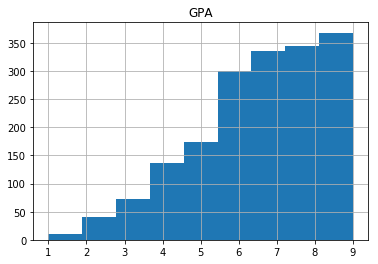

In [16]:
# Exploring data - GPA
df.hist(column='GPA', bins=9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002201016DB38>]],
      dtype=object)

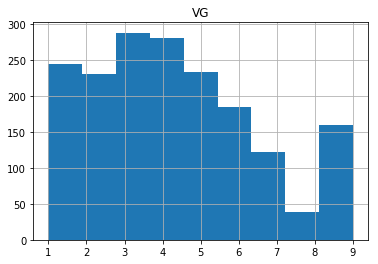

In [17]:
# Exploring data - Videogames
df.hist(column='VG', bins=9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002201028E780>]],
      dtype=object)

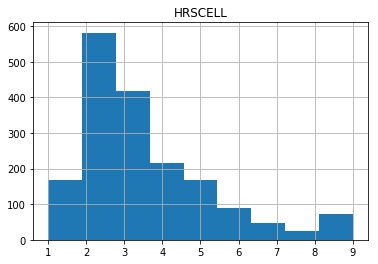

In [18]:
# Exploring data - Hours in Cell
df.hist(column='HRSCELL', bins=9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022010276278>]],
      dtype=object)

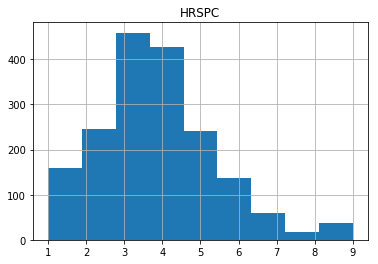

In [19]:
# Exploring data - Hours in PC
df.hist(column='HRSPC', bins=9)

In [20]:
# Defining feature sets, X
df.columns

Index(['RESPONDENT_AGE', 'SEX', 'GPA', 'HRSPC', 'VG', 'HRSCELL', 'HIGHLOWGPA'], dtype='object')

In [21]:
# Convert the Pandas data frame to a Numpy array to use scikit-learn library
X = df[['RESPONDENT_AGE', 'SEX','GPA', 'HRSPC', 'VG', 'HRSCELL', 'HIGHLOWGPA']] .values  #.astype(float)
X[0:5]

array([[1, 2, 4, 3, 9, 5, 1],
       [1, 2, 8, 3, 9, 9, 0],
       [2, 1, 3, 3, 3, 5, 1],
       [2, 1, 6, 4, 9, 9, 0],
       [2, 1, 9, 1, 1, 1, 0]], dtype=int64)

In [22]:
# Labels
y = df['HIGHLOWGPA'].values
y[0:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [23]:
# Normalizing data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.12810082,  0.94330828, -1.41764078, -0.42547343,  2.0074039 ,
         0.84327488,  1.76100807],
       [-1.12810082,  0.94330828,  0.68378934, -0.42547343,  2.0074039 ,
         2.90763492, -0.56785657],
       [ 0.88644559, -1.06009883, -1.94299831, -0.42547343, -0.52766587,
         0.84327488,  1.76100807],
       [ 0.88644559, -1.06009883, -0.36692572,  0.1552799 ,  2.0074039 ,
         2.90763492, -0.56785657],
       [ 0.88644559, -1.06009883,  1.20914687, -1.58698007, -1.37268912,
        -1.22108517, -0.56785657]])

In [24]:
# Training test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1427, 7) (1427,)
Test set: (357, 7) (357,)


In [25]:
# Importing KNN library
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# Starting the algorythm with K=2
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
# Using model to predict test set
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [30]:
# Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  1.0


In [34]:
# Calculate accuracy for different Ks
Ks = 1
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([], dtype=float64)

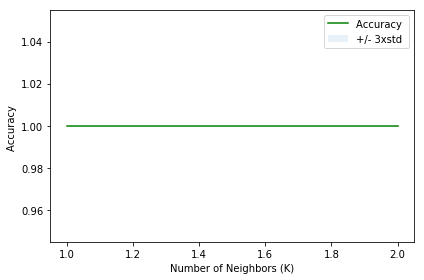

In [32]:
# Plotting model accuracy for different neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [33]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 1.0 with k= 1
